# Analizando datos de Enfermedades Transmitidas por Vector (Dengue) en México para los años 2021 y 2023

### Importando librerías

In [2]:
import sqlite3
import pandas as pd
import numpy as np
from unidecode import unidecode
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Conexión a la BD

In [3]:
# Se crea la conexión a la BD
connection = sqlite3.connect("dengue.db")

# Comprobar que la base de datos se ha creado correctamente.
print (connection.total_changes)

# Crear el cursor que te va a permitir enviar instrucciones en SQL.
cursor = connection.cursor()

0


Probemos la conexión ejecutando una consulta que nos regrese el número de registros que tiene la tabla:

In [4]:
cursor.execute("SELECT count(*) FROM dengue_301221")
rows = cursor.fetchall()

print(rows)

[(35413,)]


Primero, creamos una vista que contenga todos los registros donde la Entidad de Residencia sea Sonora:

In [5]:
# Se crea vista
"""
cursor.execute("CREATE VIEW vw_dengue_sonora AS SELECT * FROM dengue_301221 WHERE ENTIDAD_RES = 26")
rows = cursor.fetchall()
print(rows)
""";

Ahora podemos realizar consultas sobre la vista:


In [6]:
df_dengue_sonora = pd.read_sql_query("SELECT * FROM vw_dengue_sonora", connection)
df_dengue_sonora

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2021-12-13,913179,2,15,26,66,2,2,26,66,...,2,2,2,2,5,1,5,3,26,66
1,2021-12-13,920550,2,50,26,30,2,2,26,30,...,2,2,2,2,5,2,5,1,26,30
2,2021-12-13,910208,1,52,26,18,2,2,26,18,...,2,2,2,1,4,1,5,1,26,18
3,2021-12-13,920833,2,13,26,18,2,2,26,18,...,2,2,2,2,5,2,5,1,26,18
4,2021-12-13,911975,2,38,26,30,2,2,26,30,...,2,2,2,2,5,1,5,3,26,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2021-12-13,923505,1,52,26,30,2,2,26,30,...,2,2,2,2,5,1,5,3,26,30
433,2021-12-13,923800,2,24,26,3,2,2,26,42,...,2,2,2,2,5,1,5,2,26,3
434,2021-12-13,894915,2,44,26,29,2,2,26,29,...,2,2,2,2,5,1,5,3,26,29
435,2021-12-13,901370,2,25,26,29,2,2,26,29,...,2,2,2,2,5,1,5,3,26,29


Se crean los diccionarios para cargar los catálogos... 

In [7]:
# Nombre del archivo Excel
excel_file = "diccionario_datos\Catálogos_Dengue.xlsx"

# Cargar el archivo Excel
excel_data = pd.ExcelFile(excel_file)

# Obtener el nombre de todas las hojas en el archivo Excel
sheet_names = excel_data.sheet_names

# Iterar sobre cada hoja y guardarla como archivo CSV
for sheet_name in sheet_names:
    # Leer los datos de la hoja actual
    df = excel_data.parse(sheet_name)
    
    # Quitar los acentos y remplazar los espacios en los nombres...
    sheet_name = '_'.join(sheet_name.split()).upper()
    sheet_name = unidecode(sheet_name)

    # Crear el nombre del archivo CSV (usando el nombre de la hoja)
    csv_file = f'diccionario_datos\Catálogos\{sheet_name}.csv'
    
    # Guardar los datos en el archivo CSV
    df.to_csv(csv_file, index=False)
    
    print(f'Guardando {csv_file}')

# Cerrar el archivo Excel
excel_data.close()

# Luego se cargan a un diccionario de Python que contendrá todos los catálogos...
# Ruta de la carpeta que contiene los Catálogos... CSV
carpeta = 'diccionario_datos\Catálogos'

# Diccionario para almacenar los diccionarios de cada archivo CSV
diccionarios = {}

# Iterar sobre cada archivo en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith('.csv'):
        # Crear la ruta completa al archivo
        ruta_completa = os.path.join(carpeta, archivo)
        
        # Cargar el archivo CSV en un DataFrame de pandas
        df = pd.read_csv(ruta_completa)
        
        # Crear un diccionario con el nombre del archivo como clave
        # y la primera columna como clave y la segunda columna como valor
        diccionario = dict(zip(df.iloc[:, 0], df.iloc[:, 1]))
        
        # Agregar el diccionario al diccionario principal, y de paso quitarle la extensión al nombre (.csv)...
        diccionarios[archivo[:-4]] = diccionario
        # Eliminar espacios detectados a la derecha o izquierda de los valores en el diccionario...
        diccionarios[archivo[:-4]] = {clave: valor.strip() for clave, valor in diccionarios[archivo[:-4]].items()}

# Ver los diccionarios...
diccionarios.keys()

# Ahora, diccionarios contiene un diccionario para cada archivo CSV con la primera columna como clave y la segunda columna como valor...

Guardando diccionario_datos\Catálogos\CATALOGO_ESTATUS_CASO.csv
Guardando diccionario_datos\Catálogos\CATALOGO_RESULTADO_PCR.csv
Guardando diccionario_datos\Catálogos\CATALOGO_DICTAMEN.csv
Guardando diccionario_datos\Catálogos\CATALOGO_INSTITUCION.csv
Guardando diccionario_datos\Catálogos\CATALOGO_TIPO_PACIENTE.csv
Guardando diccionario_datos\Catálogos\CATALOGO_MUNICIPIO.csv
Guardando diccionario_datos\Catálogos\CATALOGO_ENTIDAD.csv
Guardando diccionario_datos\Catálogos\CATALOGO_SI_NO.csv
Guardando diccionario_datos\Catálogos\CATALOGO_SEXO.csv


dict_keys(['CATALOGO_DICTAMEN', 'CATALOGO_ENTIDAD', 'CATALOGO_ESTATUS_CASO', 'CATALOGO_INSTITUCION', 'CATALOGO_MUNICIPIO', 'CATALOGO_RESULTADO_PCR', 'CATALOGO_SEXO', 'CATALOGO_SI_NO', 'CATALOGO_TIPO_PACIENTE'])

Cargando las tablas con datos del dengue del 2021 y 2022 en DF...

In [111]:
# Tablas de la DB: "dengue_301221" y "dengue_201222"...

# Seleccionar las variables a utilizar...
variables = ["SEXO", "EDAD_ANOS", "ENTIDAD_RES", "MUNICIPIO_RES", "FECHA_SIGN_SINTOMAS",
             "TIPO_PACIENTE", "HEMORRAGICOS", "DEFUNCION", "DICTAMEN", "RESULTADO_PCR", "ESTATUS_CASO"]
columnas_select = ', '.join(variables)
# Creando la Querry de forma segura...
query_21 = f"SELECT {columnas_select} FROM dengue_301221"
query_22 = f"SELECT {columnas_select} FROM dengue_201222"

df_dengue_2021 = pd.read_sql_query(query_21, connection, parse_dates= ["FECHA_SIGN_SINTOMAS"]) # Parser las fechas de una vez...
df_dengue_2022 = pd.read_sql_query(query_22, connection, parse_dates= ["FECHA_SIGN_SINTOMAS"])

# Mapear los catálogos para trabajar de forma cómoda con los datos...
df_dengue_2021["SEXO"] = df_dengue_2021["SEXO"].map(diccionarios["CATALOGO_SEXO"])
df_dengue_2021["ENTIDAD_RES"] = df_dengue_2021["ENTIDAD_RES"].map(diccionarios["CATALOGO_ENTIDAD"])
df_dengue_2021["MUNICIPIO_RES"] = df_dengue_2021["MUNICIPIO_RES"].map(diccionarios["CATALOGO_MUNICIPIO"])
df_dengue_2021["TIPO_PACIENTE"] = df_dengue_2021["TIPO_PACIENTE"].map(diccionarios["CATALOGO_TIPO_PACIENTE"])
df_dengue_2021["HEMORRAGICOS"] = df_dengue_2021["HEMORRAGICOS"].map(diccionarios["CATALOGO_SI_NO"])
df_dengue_2021["DEFUNCION"] = df_dengue_2021["DEFUNCION"].map(diccionarios["CATALOGO_SI_NO"])
df_dengue_2021["DICTAMEN"] = df_dengue_2021["DICTAMEN"].map(diccionarios["CATALOGO_DICTAMEN"])
df_dengue_2021["RESULTADO_PCR"] = df_dengue_2021["RESULTADO_PCR"].map(diccionarios["CATALOGO_RESULTADO_PCR"])
df_dengue_2021["ESTATUS_CASO"] = df_dengue_2021["ESTATUS_CASO"].map(diccionarios["CATALOGO_ESTATUS_CASO"])
df_dengue_2021["FECHA_SIGN_SINTOMAS"].sort_values()
df_dengue_2021["MESES"] = df_dengue_2021["FECHA_SIGN_SINTOMAS"].dt.month

df_dengue_2022["SEXO"] = df_dengue_2022["SEXO"].map(diccionarios["CATALOGO_SEXO"])
df_dengue_2022["ENTIDAD_RES"] = df_dengue_2022["ENTIDAD_RES"].map(diccionarios["CATALOGO_ENTIDAD"])
df_dengue_2022["MUNICIPIO_RES"] = df_dengue_2022["MUNICIPIO_RES"].map(diccionarios["CATALOGO_MUNICIPIO"])
df_dengue_2022["TIPO_PACIENTE"] = df_dengue_2022["TIPO_PACIENTE"].map(diccionarios["CATALOGO_TIPO_PACIENTE"])
df_dengue_2022["HEMORRAGICOS"] = df_dengue_2022["HEMORRAGICOS"].map(diccionarios["CATALOGO_SI_NO"])
df_dengue_2022["DEFUNCION"] = df_dengue_2022["DEFUNCION"].map(diccionarios["CATALOGO_SI_NO"])
df_dengue_2022["DICTAMEN"] = df_dengue_2022["DICTAMEN"].map(diccionarios["CATALOGO_DICTAMEN"])
df_dengue_2022["RESULTADO_PCR"] = df_dengue_2022["RESULTADO_PCR"].map(diccionarios["CATALOGO_RESULTADO_PCR"])
df_dengue_2022["ESTATUS_CASO"] = df_dengue_2022["ESTATUS_CASO"].map(diccionarios["CATALOGO_ESTATUS_CASO"])
df_dengue_2022["FECHA_SIGN_SINTOMAS"].sort_values()
df_dengue_2022["MESES"] = df_dengue_2022["FECHA_SIGN_SINTOMAS"].dt.month

print(f"Dengue 2021: {df_dengue_2021.shape[0]} casos. Dengue 2022: {df_dengue_2022.shape[0]} casos.")
print("Dengue 2022:")
df_dengue_2022.head()

Dengue 2021: 35413 casos. Dengue 2022: 57730 casos.
Dengue 2022:


,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,FECHA_SIGN_SINTOMAS,TIPO_PACIENTE,HEMORRAGICOS,DEFUNCION,DICTAMEN,RESULTADO_PCR,ESTATUS_CASO,MESES
0,MUJER,47,NAYARIT,JEREZ,2022-01-26,AMBULATORIO,NO,NO,NO APLICA,SIN SEROTIPO AISLADO,DESCARTADO,1
1,MUJER,34,SINALOA,HUANUSCO,2022-01-29,AMBULATORIO,NO,NO,NO APLICA,SIN SEROTIPO AISLADO,DESCARTADO,1
2,HOMBRE,50,QUINTANA ROO,APULCO,2022-01-29,AMBULATORIO,NO,NO,NO APLICA,SIN SEROTIPO AISLADO,DESCARTADO,1
3,HOMBRE,23,VERACRUZ DE IGNACIO DE LA LLAVE,VERACRUZ,2022-01-28,HOSPITALIZADO,NO,NO,NO APLICA,SIN SEROTIPO AISLADO,DESCARTADO,1
4,HOMBRE,23,GUERRERO,MIGUEL AUZA,2022-04-10,AMBULATORIO,NO,NO,NO APLICA,SIN SEROTIPO AISLADO,PROBABLE,4


Casos Confirmados, Fallecidos x meses x años.

In [112]:
muertes_dengue_2021 = df_dengue_2021[(df_dengue_2021["ESTATUS_CASO"] == "CONFIRMADO") & (df_dengue_2021["DEFUNCION"] == "SI")]
muertes_dengue_2021 = muertes_dengue_2021[["MESES"]].groupby(by =[muertes_dengue_2021["MESES"]]).count()
muertes_dengue_2021.columns = ["CASOS"]
muertes_dengue_2021 = muertes_dengue_2021.reset_index()

muertes_dengue_2022 = df_dengue_2022[(df_dengue_2022["ESTATUS_CASO"] == "CONFIRMADO") & (df_dengue_2022["DEFUNCION"] == "SI")]
muertes_dengue_2022 = muertes_dengue_2022[["MESES"]].groupby(by =[muertes_dengue_2022["MESES"]]).count()
muertes_dengue_2022.columns = ["CASOS"]
muertes_dengue_2022 = muertes_dengue_2022.reset_index()

# muertes_dengue_2021

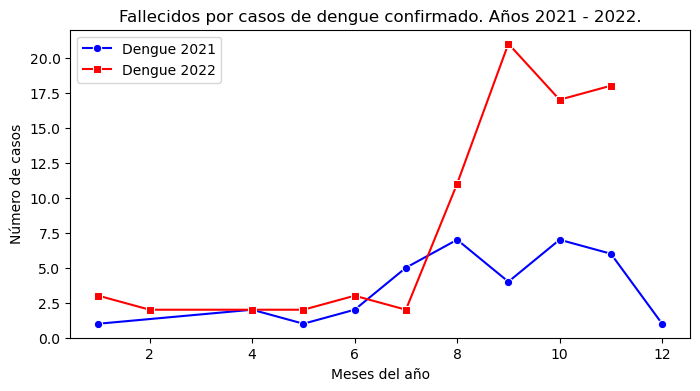

In [130]:
plt.figure(figsize=(8, 4))

ax = sns.lineplot(data = muertes_dengue_2021, x ='MESES' , y = "CASOS", color = "blue", label = "Dengue 2021", marker='o')
ax = sns.lineplot(data = muertes_dengue_2022, x ='MESES' , y = "CASOS", color = "red", label = "Dengue 2022", marker='s')
ax.set(title = "Fallecidos por casos de dengue confirmado. Años 2021 - 2022.", xlabel = "Meses del año", ylabel = "Número de casos")

#sns.set(title = )
plt.legend()

# Mostrar el gráfico
plt.show()

Acá se pudo observar como en ambos años ocurre un alza de los casos de fallecidos por dengue en México hacia los últimos meses del año.
Notándose además que estas cifras fueron mayores en el 2022.

Casos confirmados para Dengue y Ch en Sonora:

In [ ]:

df_confirmados_sonora = pd.read_sql_query("SELECT * \
                                            FROM vw_dengue_sonora \
                                            WHERE Dictamen = 1 \
                                                OR Dictamen = 2" \
                                        , connection)
df_confirmados_sonora



,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG


Realizando comparaciones entre las Bases de datos de los años 2021 y 2022...

### Cerrando la conexión a la BD

In [ ]:

"""
connection.commit()

# Cierra la conexión con la base de datos.
connection.close()
"""

'\nconnection.commit()\n\n# Cierra la conexión con la base de datos.\nconnection.close()\n'